In [27]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
import numpy as np
import pandas as pd

df = pd.read_csv('qog_std_cs_jan18.csv')

# Requerimiento 1

In [28]:
digitos_rut = 6197
np.random.seed(digitos_rut)
df_sample = df.sample(frac=.5)

In [29]:
df_sample_N_Z = df_sample.loc[:, ['undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc', 'imf_pop',
                                                                    'wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']]
                                                                    
df_sample_N_Z['ht_region'] = df_sample_N_Z['ht_region'].replace(
                                                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                                    ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian', 'WesternDem', 
                                                    'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean'])

# Requerimiento 2

    Función medidas descriptivas

In [30]:
def descriptive_data(objeto):
    # medidas descriptivas para los casos continuos
    describe_casos_continuos = objeto.describe()
    
    # frecuencia para variables discretas
    frec_ccodealp = objeto.groupby(['ccodealp']).size()
    frec_ht_region = objeto.groupby(['ht_region']).size()
    
    # estadísticas descriptivas
    lista_columnas = ['gle_cgdpc', 'undp_hdi','imf_pop']
    for elemento in lista_columnas:
        mean_objeto = round(objeto[elemento].mean(),5)
        median_objeto = round(objeto[elemento].median(),5)
        var_objeto = round(objeto[elemento].var(),5)
        std_objeto = round(objeto[elemento].std(),5)
    
        print(f"""
        La media de '{elemento}' es: {mean_objeto}
        La mediana de '{elemento}' es: {median_objeto}
        La varianza de '{elemento}' es: {var_objeto}
        La desviación estándar de '{elemento}' es: {std_objeto} """)
    
    return describe_casos_continuos, frec_ccodealp, frec_ht_region

print(descriptive_data(df_sample_N_Z))


        La media de 'gle_cgdpc' es: 17461.33507
        La mediana de 'gle_cgdpc' es: 10445.295
        La varianza de 'gle_cgdpc' es: 402438731.15919
        La desviación estándar de 'gle_cgdpc' es: 20060.87563 

        La media de 'undp_hdi' es: 0.72014
        La mediana de 'undp_hdi' es: 0.739
        La varianza de 'undp_hdi' es: 0.02391
        La desviación estándar de 'undp_hdi' es: 0.15463 

        La media de 'imf_pop' es: 30.08101
        La mediana de 'imf_pop' es: 7.0235
        La varianza de 'imf_pop' es: 3224.76858
        La desviación estándar de 'imf_pop' es: 56.78705 
(        undp_hdi      gle_cgdpc     imf_pop   wef_imort  who_alc2000  \
count  93.000000      96.000000   72.000000   75.000000    90.000000   
mean    0.720140   17461.335069   30.081014   20.856000     5.101889   
std     0.154627   20060.875633   56.787046   23.036917     3.811606   
min     0.351000     644.539980    0.012000    1.700000     0.000000   
25%     0.582000    3269.292425    1.872

# Requerimiento 3

    Función datos perdidos

In [31]:
# Función datos perdidos
def missing_data(dataframe, var, print_list=False):
    
    df_null = dataframe[var].isnull()  
    count_missing_data = df_null.sum()
    percentaje_missing_data = count_missing_data/len(dataframe)

    if print_list == True:
        print(dataframe[df_null]['ccodealp'])      
    return count_missing_data, percentaje_missing_data

In [32]:
# encontramos las variables con mayor cantidad de datos perdidos
lista_variables = ['undp_hdi', 'gle_cgdpc', 'imf_pop', 'wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']
for variable in lista_variables:
    datos_perdidos, porcentaje_perdidos = missing_data(dataframe=df, var=variable, print_list=False)
    print(variable,':', datos_perdidos)

undp_hdi : 8
gle_cgdpc : 2
imf_pop : 49
wef_imort : 44
who_alc2000 : 12
who_tobt : 70
wdi_exph : 4


In [33]:
# Lista países con ausencia de datos
lista_mayor_casos_perdidos = ['who_tobt', 'imf_pop', 'wef_imort']
for variable in lista_mayor_casos_perdidos:
    missing_data(dataframe=df_sample_N_Z, var=variable, print_list=True)

141    QAT
147    VCT
174    TTO
133    PNG
98     LBY
5      ATG
190    VEN
135    PER
169    SYR
99     LIE
148    SMR
124    NIC
129    MHL
55     ERI
165    SUR
19     BWA
176    TUN
159    SOM
178    TKM
145    KNA
49     DMA
4      AGO
9      AUT
192    YEM
170    TJK
53     GNQ
10     BHS
149    STP
91     KWT
70     GIN
0      AFG
22     SLB
63     GMB
45     CYP
164    SDN
102    MDG
Name: ccodealp, dtype: object
36     CHN
125    NER
5      ATG
190    VEN
169    SYR
99     LIE
73     HND
55     ERI
19     BWA
50     DOM
176    TUN
72     HTI
159    SOM
178    TKM
145    KNA
49     DMA
151    SEN
3      AND
192    YEM
53     GNQ
76     IND
149    STP
63     GMB
164    SDN
102    MDG
Name: ccodealp, dtype: object
147    VCT
133    PNG
125    NER
5      ATG
99     LIE
148    SMR
191    WSM
129    MHL
55     ERI
159    SOM
178    TKM
145    KNA
49     DMA
3      AND
53     GNQ
173    TON
10     BHS
149    STP
0      AFG
119    NRU
22     SLB
164    SDN
Name: ccodealp, dtype: obje

# Requerimiento 4

    Función histogramas

¿En qué variables la media de la muestra es mayor a la de los datos completos?
En la variable 'who_alc2000


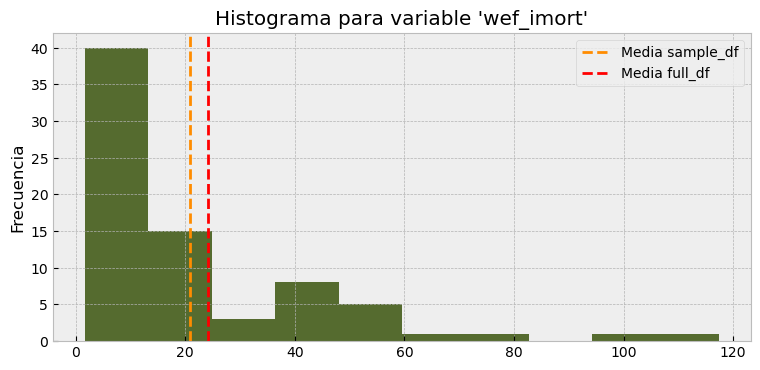

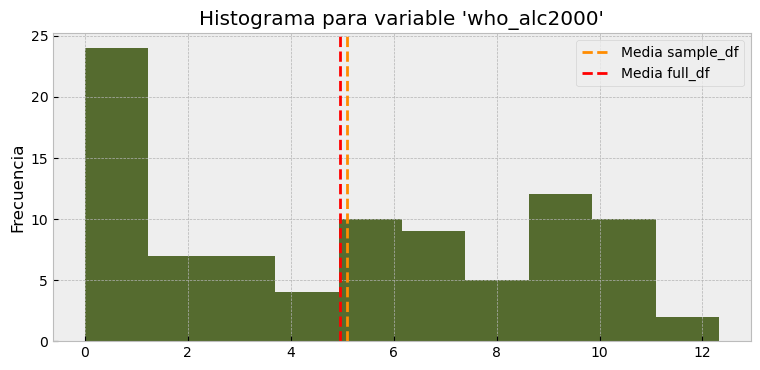

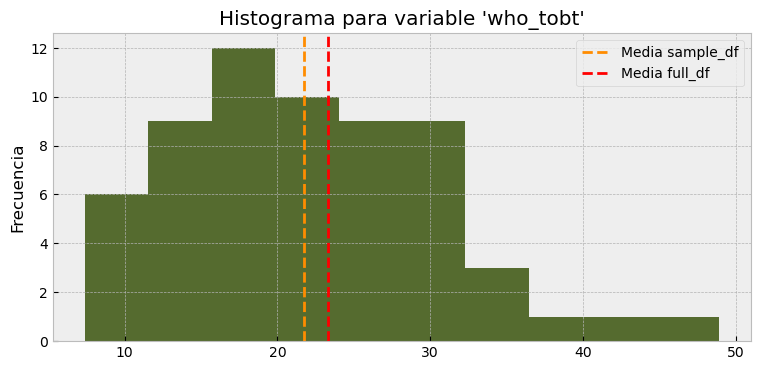

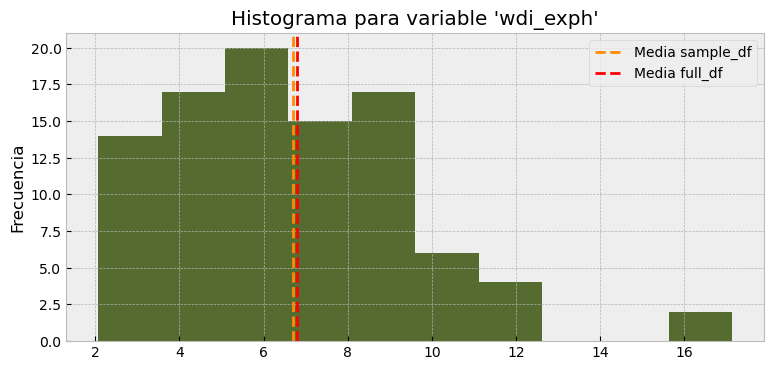

In [34]:
def histograma(sample_df, full_df, var, sample_mean=False, true_mean=False):
    
    plt.figure(figsize=(9,4))  # crea una nueva figura
    plt.hist(sample_df[var], color='darkolivegreen')
    plt.title(f"Histograma para variable '{var}'")
    plt.ylabel('Frecuencia')

    # media para sample_df
    if sample_mean == True:
        plt.axvline(sample_df[var].mean(), color='darkorange', linestyle='--', label='Media sample_df')
        plt.legend(loc='best')
    # media para full_df
    if true_mean == True:
        plt.axvline(full_df[var].mean(), color='red', linestyle='--', label='Media full_df')
        plt.legend(loc='best')


# histogramas para las 4 variables
lista_variables = ['wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']
for variable in lista_variables:
    histograma(sample_df=df_sample_N_Z, full_df=df, var=variable, sample_mean=True, true_mean=True)

print("¿En qué variables la media de la muestra es mayor a la de los datos completos?")
print("En la variable 'who_alc2000")

# Requerimiento 5

    Función dotplots

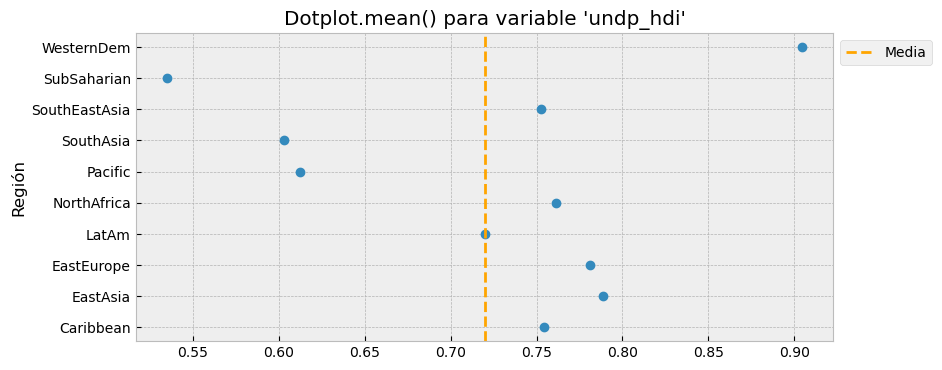

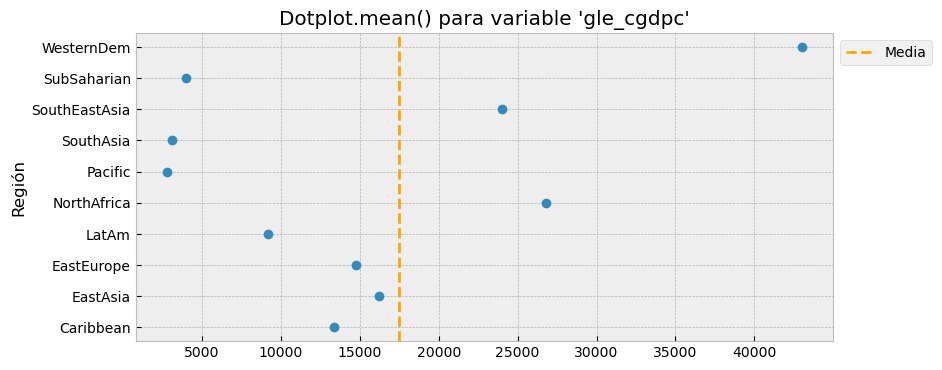

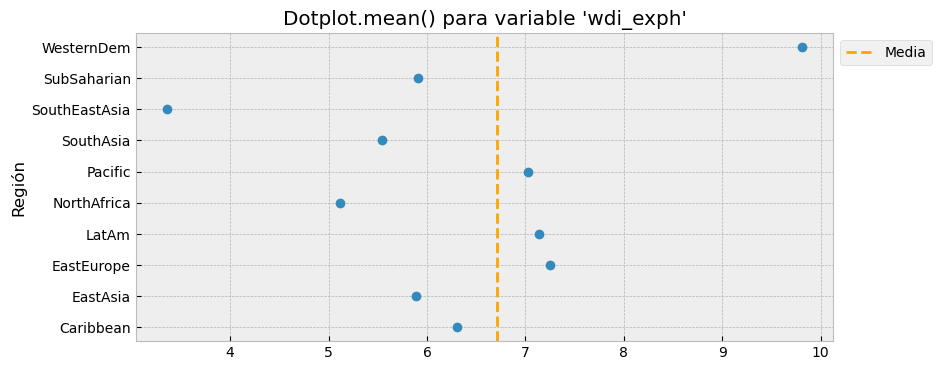

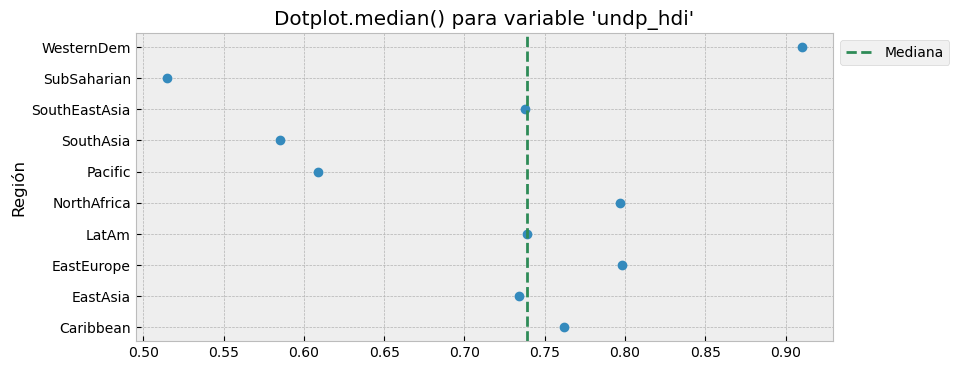

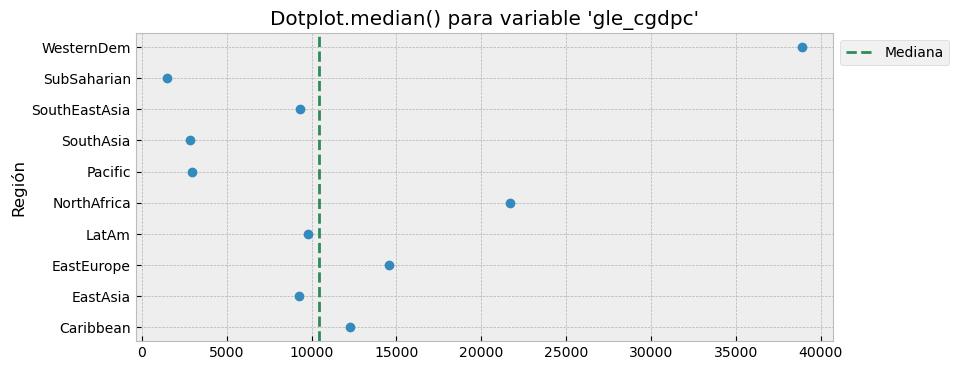

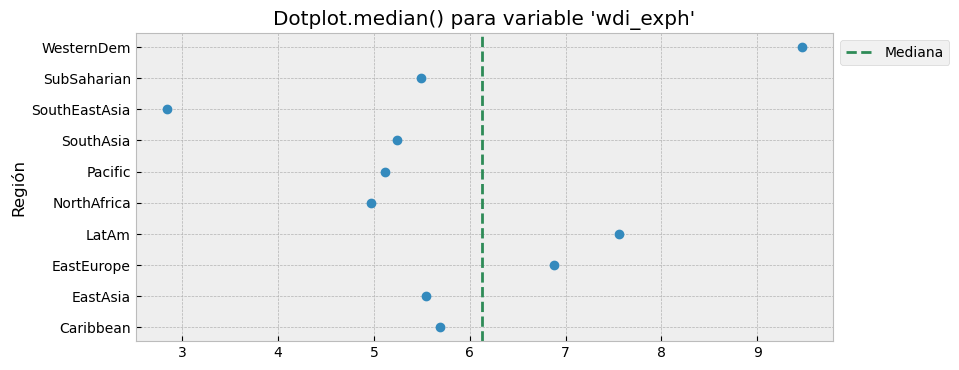

In [35]:
def dotplot_graphic(dataframe, plot_var, plot_by, statistic='mean', global_stat=False):  
    plt.figure(figsize=(9,4))
    plt.ylabel('Región')
    if global_stat == True:
        if statistic == 'mean':
            dot_region = dataframe.groupby(plot_by)[plot_var].mean()
            plt.title(f"Dotplot.mean() para variable '{plot_var}'")
            plt.plot(dot_region.values, dot_region.index,'o')
            plt.axvline(dataframe[plot_var].mean(), color='orange', linestyle='--', lw=2, label='Media')
            plt.legend(bbox_to_anchor=(1, 1))

        elif statistic == 'median':
            dot_region = dataframe.groupby(plot_by)[plot_var].median()
            plt.title(f"Dotplot.median() para variable '{plot_var}'")
            plt.plot(dot_region.values, dot_region.index,'o')
            plt.axvline(dataframe[plot_var].median(), color='seagreen', linestyle='--', lw=2, label='Mediana')
            plt.legend(bbox_to_anchor=(1, 1))

    elif global_stat == False:
        if statistic == 'mean':
            dot_region = dataframe.groupby(plot_by)[plot_var].mean()
            plt.title(f"Dotplot.mean() para variable '{plot_var}'")
            plt.plot(dot_region.values, dot_region.index,'o')

        elif statistic == 'median':
            dot_region = dataframe.groupby(plot_by)[plot_var].median()
            plt.title(f"Dotplot.median() para variable '{plot_var}'")
            plt.plot(dot_region.values, dot_region.index,'o')



# Casos media
menos_casos_perdidos = ['undp_hdi', 'gle_cgdpc','wdi_exph']
for variable in menos_casos_perdidos:
    dotplot_graphic(dataframe=df_sample_N_Z, plot_var=variable, plot_by='ht_region', statistic='mean', global_stat=True)

# Casos mediana
for variable in menos_casos_perdidos:
    dotplot_graphic(dataframe=df_sample_N_Z, plot_var=variable, plot_by='ht_region', statistic='median', global_stat=True)


# Requerimiento 6

In [36]:
#df_sample_N_Z.to_csv('subsample_SN_demo.csv')